<a href="https://colab.research.google.com/github/microprediction/timeseries-notebooks/blob/main/fbprophet_hello.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fbprophet
import logging, sys
logging.disable(sys.maxsize)

In [ ]:
!pip install microprediction

### fbprophet hello world
See https://www.microprediction.com/blog/popular-timeseries-packages for more packages

In [3]:
from microprediction import MicroReader
mr = MicroReader()
YS = mr.get_lagged_values(name='emojitracker-twitter-face_with_medical_mask.json')[:20]

In [14]:
from fbprophet import Prophet
import pandas as pd 
import datetime 
def prophet_next(ys:[float])->float:
   """ Predict the next point in a series """
   m = Prophet()
   df = pd.DataFrame(columns=['y'],data=ys)
   df['ds'] = pd.date_range(start='2021-01-01', periods=len(ys), freq='D')
   m.fit(df)
   future = m.make_future_dataframe(periods=1)
   forecast = m.predict(future)
   return forecast['yhat'].values[0]
   
def run(ys):
  """ Slow, see river package or others if you don't like """
  burnin = 10
  y_hats = list()
  for t in range(len(ys)):
     if t>burnin:
        y_hat = prophet_next(ys[:t])
     elif t>=1:
        y_hat = ys[t-1]
     else:
        y_hat = 0 
     y_hats.append(y_hat)
  return y_hats 

In [19]:
XS = run(YS)

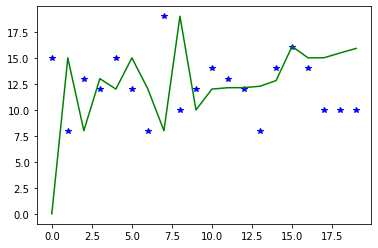

In [20]:
import matplotlib.pyplot as plt
plt.plot(YS[:25],'*b')
plt.plot(XS[:25],'g')